In [42]:
from PattRecClasses import DiscreteD, GaussD, HMM, MarkovChain, GetPx
from matplotlib import pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy.signal import firwin,filtfilt
from GetMusicFeatures import GetMusicFeatures
from FeatureExtractor import FeatureExtractor
import numpy as np
import pickle as pkl
def lowpass(x,fc,fs=44100):
    """ x is the signal, 
        fc is the cuttoff frequency expressed in Hz, must be between [0,fs/2]
    """
    b = firwin(1024, fc,fs=fs)
    y = filtfilt(b,1,x)
    return y

In [45]:
import glob 
import random

two_all  = glob.glob('humming_record/2/*.wav')
two_all.sort()

ten_all  = glob.glob('humming_record/10/*.wav')
ten_all.sort()


In [44]:
two_all_feature_data = []
# names = [str(blues_all),str(classical_all),str(country_all),str(disco_all),str(hiphop_all),str(jazz_all),str(mental_all),str(pop_all),str(reggae_all),str(rock_all)]
for song in two_all:
    samplerate1,data_1=wavfile.read(song)
    data_1=lowpass(data_1[:,0],1500,fs=samplerate1)
    logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
    logf_1= np.expand_dims(logf_1, axis=0)
    two_all_feature_data.append(logf_1)

<ipython-input-44-7050e876c9e0>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1,data_1=wavfile.read(song)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


In [46]:
ten_all_feature_data = []
# names = [str(blues_all),str(classical_all),str(country_all),str(disco_all),str(hiphop_all),str(jazz_all),str(mental_all),str(pop_all),str(reggae_all),str(rock_all)]
for song in ten_all:
    samplerate1,data_1=wavfile.read(song)
    data_1=lowpass(data_1[:,0],1500,fs=samplerate1)
    logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
    logf_1= np.expand_dims(logf_1, axis=0)
    ten_all_feature_data.append(logf_1)

<ipython-input-46-cc533b088a9a>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1,data_1=wavfile.read(song)


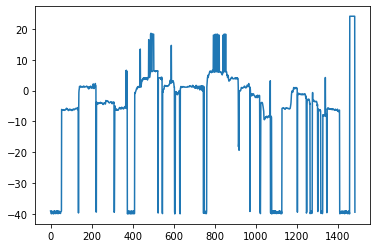

In [68]:
plt.plot(two_all_feature_data[2][0])

In [69]:
twosix_all  = glob.glob('humming_record/26/*.wav')
twosix_all.sort()

threefour_all  = glob.glob('humming_record/34/*.wav')
threefour_all.sort()

In [70]:
twosix_all_feature_data = []
for song in twosix_all:
    samplerate1,data_1=wavfile.read(song)
    data_1=lowpass(data_1[:,0],1500,fs=samplerate1)
    logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
    logf_1= np.expand_dims(logf_1, axis=0)
    twosix_all_feature_data.append(logf_1)

threefour_all_feature_data = []
for song in threefour_all:
    samplerate1,data_1=wavfile.read(song)
    data_1=lowpass(data_1[:,0],1500,fs=samplerate1)
    logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
    logf_1= np.expand_dims(logf_1, axis=0)
    threefour_all_feature_data.append(logf_1)

<ipython-input-70-91d170a2d6b7>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1,data_1=wavfile.read(song)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
<ipython-input-70-91d170a2d6b7>:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1,data_1=wavfile.read(song)


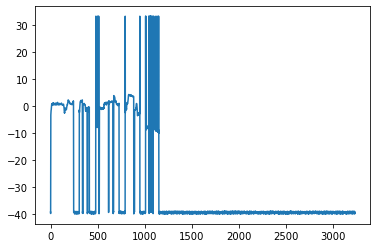

In [88]:
plt.plot(threefour_all_feature_data[13][0])

In [71]:
data_list = [two_all_feature_data, 
            ten_all_feature_data,
            twosix_all_feature_data,
            threefour_all_feature_data]

In [72]:
q = np.array([0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025])
A = np.array([[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025]])
mc = MarkovChain(q,A)

g1 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g2 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g3 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g4 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g5 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g6 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g7 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g8 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g9 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
two_h  = HMM( mc, [g1, g2, g3, g4, g5, g6, g7, g8, g9]) 

q2 = np.array([0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025])
A2 = np.array([[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025]])
mc2 = MarkovChain(q2,A2)

g12 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g22 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g32 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g42 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g52 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g62 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g72 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g82 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g92 = GaussD( means=[10], stdevs=[1])   # Distribution for state = 4
ten_h = HMM( mc2, [g12, g22, g32, g42, g52, g62, g72, g82, g92]) 

# q3 = np.array([0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025])
# A3 = np.array([[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025]])
# mc3 = MarkovChain(q3,A3)

# g13 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
# g23 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
# g33 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
# g43 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
# g53 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
# g63 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
# g73 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
# g83 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
# g93 = GaussD( means=[10], stdevs=[1])   # Distribution for state = 4
# country_h = HMM( mc3, [g13, g23, g33, g43, g53, g63, g73, g83, g93]) 

q4 = np.array([0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025])
A4 = np.array([[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025]])
mc4 = MarkovChain(q4,A4)

g14 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g24 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g34 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g44 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g54 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g64 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g74 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g84 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g94 = GaussD( means=[100], stdevs=[1])   # Distribution for state = 4
twosix_h = HMM( mc4, [g14, g24, g34, g44, g54, g64, g74, g84, g94]) 

q5 = np.array([0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025])
A5 = np.array([[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025],[0.1,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.025]])
mc5 = MarkovChain(q5,A5)

g15 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g25 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g35 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g45 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g55 = GaussD( means=[0], stdevs=[1] )   # Distribution for state = 1
g65 = GaussD( means=[10], stdevs=[2] )  # Distribution for state = 2
g75 = GaussD( means=[4], stdevs=[10])   # Distribution for state = 3
g85 = GaussD( means=[0], stdevs=[1])   # Distribution for state = 4
g95 = GaussD( means=[100], stdevs=[1])   # Distribution for state = 4
threefour_h = HMM( mc5, [g15, g25, g35, g45, g55, g65, g75, g85, g95]) 

HMM_list = [two_h, ten_h, twosix_h, threefour_h]

In [73]:
def cross_validation(HMM_list, data_list, K_number):
       
    class_number = len(HMM_list)
    
    number_data_per_chuck = int(15/K_number)
    
    confusion_matrix_list = []
    
    for K in range(K_number): #K_number fold crossvalidation 每次的train和test list都不一样   
        
        print('K:',K)
        ###############create train_list and test_list per K_fold Test##################
        train_list = []
        test_list = []
        for index in range(class_number):
            train_set = []
            test_set = []
            for loop in range(15):
                if loop not in range(number_data_per_chuck*K,number_data_per_chuck*(K+1)):
                    train_set.append(data_list[index][loop])
                else:
                    test_set.append(data_list[index][loop])
            train_list.append(train_set)
            test_list.append(test_set)
#         print(len(train_list[0]))
#         print(len(test_list[0]))
            
        ###############train HMM##################        
        for index in range(class_number):
            HMM_list[index].train(train_list[index],len(train_list[index]))
        
        ###############test each song in test_set##################
        confusion_matrix = np.zeros([class_number,class_number])
        
        for index in range(class_number):
            true_label = index
            
            for each_song in test_list[index]:  ###有100/K_number首
                
                prob_list = []

                for HMM_index in range(class_number):
                    logprob = HMM_list[HMM_index].logprob(each_song)
                    prob_list.append(logprob)

                classification_result = prob_list.index(max(prob_list))
                confusion_matrix[true_label,classification_result] += 1
                
        print(confusion_matrix)
        confusion_matrix_list.append(confusion_matrix)
    
    
    return confusion_matrix_list

In [81]:
K_number = 3
confusion_matrix_list = cross_validation(HMM_list, data_list, K_number)

K: 0
logprob: -3467.7430402402288  ite: 1
logprob: -3467.8354372899535  ite: 2
prob_change: -0.09239704972469553 terminate after ite: 2
logprob: -2717.2373063736436  ite: 1
logprob: -2715.8361181076984  ite: 2
logprob: -2715.8613887283655  ite: 3
prob_change: -0.025270620667015464 terminate after ite: 3
logprob: -11579.701223349572  ite: 1
logprob: -11596.202518747408  ite: 2
prob_change: -16.501295397836657 terminate after ite: 2
logprob: -13849.46759494128  ite: 1
logprob: -13849.46637889176  ite: 2
prob_change: 0.0012160495189164067 terminate after ite: 2
[[5. 0. 0. 0.]
 [1. 4. 0. 0.]
 [5. 0. 0. 0.]
 [4. 0. 1. 0.]]
K: 1
logprob: -3467.6034341217346  ite: 1
logprob: -3467.5078605282624  ite: 2
prob_change: 0.09557359347218153 terminate after ite: 2
logprob: -2712.1645954215687  ite: 1
logprob: -2712.126141847941  ite: 2
prob_change: 0.03845357362752111 terminate after ite: 2
logprob: -11574.673696115775  ite: 1
logprob: -11570.191014023316  ite: 2
logprob: -11570.120229150296  ite: 3

/Users/tonyrhapsody/Desktop/song classification/PattRecClasses/MarkovChain.py:193: RuntimeWarning: overflow encountered in true_divide
  beta_hat[:,np.shape(pX)[1]-t-1] = (np.dot(self.A[:,:np.shape(pX)[0]],pX[:,np.shape(pX)[1]-t]*beta_hat[:,np.shape(pX)[1]-t]))/c[len(c)-t-1]
/Users/tonyrhapsody/Desktop/song classification/PattRecClasses/MarkovChain.py:193: RuntimeWarning: invalid value encountered in multiply
  beta_hat[:,np.shape(pX)[1]-t-1] = (np.dot(self.A[:,:np.shape(pX)[0]],pX[:,np.shape(pX)[1]-t]*beta_hat[:,np.shape(pX)[1]-t]))/c[len(c)-t-1]
/Users/tonyrhapsody/Desktop/song classification/PattRecClasses/HMM.py:136: RuntimeWarning: invalid value encountered in multiply
  gamma_matrix = alphahat_matrix * betahat_matrix * c[0:T]
/Users/tonyrhapsody/Desktop/song classification/PattRecClasses/HMM.py:151: RuntimeWarning: invalid value encountered in double_scalars
  zeta_matrix[ii,jj] = alphahat_matrix[ii,tt] * A_iterate[ii,jj] * pX[jj,tt+1] * betahat_matrix[jj,tt+1]


ValueError: array must not contain infs or NaNs

In [ ]:
aa = np.zeros([2,2])
for i in range(len(confusion_matrix_list)):
    aa += confusion_matrix_list[i]
aa

In [ ]:
q26_data = []
samplerate1,data_1=wavfile.read('humming_record/q26.wav')
data_1=lowpass(data_1,1500,fs=samplerate1)
logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
logf_1= np.expand_dims(logf_1, axis=0)
q26_data.append(logf_1)

q34_data = []
samplerate1,data_1=wavfile.read('humming_record/q34.wav')
data_1=lowpass(data_1,1500,fs=samplerate1)
logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
logf_1= np.expand_dims(logf_1, axis=0)
q34_data.append(logf_1)



In [ ]:
print(two_h.logprob(q2_data[0]),two_h.logprob(q10_data[0]), two_h.logprob(q26_data[0]), two_h.logprob(q34_data[0]))
print(ten_h.logprob(q2_data[0]),ten_h.logprob(q10_data[0]), ten_h.logprob(q26_data[0]),ten_h.logprob(q34_data[0]))
print(twosix_h.logprob(q2_data[0]),twosix_h.logprob(q10_data[0]),twosix_h.logprob(q26_data[0]),twosix_h.logprob(q34_data[0]))
print(threefour_h.logprob(q2_data[0]),threefour_h.logprob(q10_data[0]),threefour_h.logprob(q26_data[0]),threefour_h.logprob(q34_data[0]))



In [56]:
K_number = 3
confusion_matrix_list = cross_validation(HMM_list, data_list, K_number)

K: 0
logprob: -5174.919522587998  ite: 1
logprob: -3491.0909687291114  ite: 2
logprob: -3466.1424794190348  ite: 3
logprob: -3467.601738630194  ite: 4
prob_change: -1.4592592111594058 terminate after ite: 4
logprob: -3245.1054050321186  ite: 1
logprob: -3064.073627068057  ite: 2
logprob: -2787.240855610215  ite: 3
logprob: -2718.2443575421207  ite: 4
[[5. 0.]
 [1. 4.]]
K: 1
logprob: -3467.586368633647  ite: 1
logprob: -3467.5066741251167  ite: 2
prob_change: 0.07969450853033777 terminate after ite: 2
logprob: -2712.3415355965367  ite: 1
logprob: -2712.1351457212095  ite: 2
prob_change: 0.2063898753272042 terminate after ite: 2
[[5. 0.]
 [0. 5.]]
K: 2
logprob: -3716.2446877897382  ite: 1
logprob: -3715.7325239919705  ite: 2
prob_change: 0.5121637977676983 terminate after ite: 2
logprob: -2986.4683926462867  ite: 1
logprob: -2987.1619525998485  ite: 2
prob_change: -0.6935599535618167 terminate after ite: 2
[[5. 0.]
 [2. 3.]]


In [64]:
aa = np.zeros([2,2])
for i in range(len(confusion_matrix_list)):
    aa += confusion_matrix_list[i]
aa

array([[15.,  0.],
       [ 3., 12.]])

In [58]:
q2_data = []
samplerate1,data_1=wavfile.read('humming_record/q2.wav')
data_1=lowpass(data_1,1500,fs=samplerate1)
logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
logf_1= np.expand_dims(logf_1, axis=0)
q2_data.append(logf_1)

In [59]:
q10_data = []
samplerate1,data_1=wavfile.read('humming_record/q10.wav')
data_1=lowpass(data_1,1500,fs=samplerate1)
logf_1=FeatureExtractor(data_1,samplerate1)# Extracted feature of the song
logf_1= np.expand_dims(logf_1, axis=0)
q10_data.append(logf_1)

In [62]:
print(two_h.logprob(q2_data[0]),two_h.logprob(q10_data[0]))
print(ten_h.logprob(q2_data[0]),ten_h.logprob(q10_data[0]))

-3885.053639223255 -3255.044013518698
-6164.015942681425 -2396.0856033443106


In [89]:
for i in range(9):
    print(HMM_list[0].outputDistr[i].means)

[-6.13694639]
[3.11253553]
[-39.46254953]
[-6.13694639]
[-6.13694639]
[3.11253553]
[-39.46254953]
[-6.13694639]
[-6.13694639]


In [66]:
for i in range(9):
    print(HMM_list[1].outputDistr[i].means)

[-1.99919218]
[-0.11816071]
[-16.58102962]
[-1.99919216]
[-1.99919216]
[-0.11816071]
[-16.58102962]
[-1.99919216]
[4.69344016]
